Karan Aryal

MSCS-634-B01

Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms

In [16]:
#Importing libraries

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
wine = load_wine()

In [17]:
# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='class')

In [18]:
# Check dimensions and head
print("Shape of feature matrix:", X.shape)
print("Unique classes:", y.unique())

Shape of feature matrix: (178, 13)
Unique classes: [0 1 2]


In [19]:
# Feature summary
print("Feature Summary Statistics:")
print(X.describe().T)

Feature Summary Statistics:
                              count        mean         std     min       25%  \
alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
malic_acid                    178.0    2.336348    1.117146    0.74    1.6025   
ash                           178.0    2.366517    0.274344    1.36    2.2100   
alcalinity_of_ash             178.0   19.494944    3.339564   10.60   17.2000   
magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
total_phenols                 178.0    2.295112    0.625851    0.98    1.7425   
flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
nonflavanoid_phenols          178.0    0.361854    0.124453    0.13    0.2700   
proanthocyanins               178.0    1.590899    0.572359    0.41    1.2500   
color_intensity               178.0    5.058090    2.318286    1.28    3.2200   
hue                           178.0    0.957449    0.228572    0.48    0.7825   


In [20]:
# Class distribution
print("Class Distribution:")
print(y.value_counts())

Class Distribution:
class
1    71
0    59
2    48
Name: count, dtype: int64


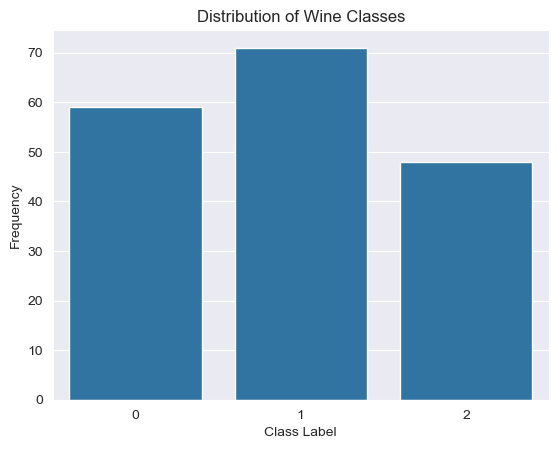

In [21]:
# Visualizing class distribution
sns.countplot(x=y)
plt.title("Distribution of Wine Classes")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.show()

In [22]:
# Z-score standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converting DataFrame for consistency and readability
X_scaled = pd.DataFrame(X_scaled, columns=wine.feature_names)
print(X_scaled.describe().T)

                              count          mean       std       min  \
alcohol                       178.0  7.943708e-15  1.002821 -2.434235   
malic_acid                    178.0  3.592632e-16  1.002821 -1.432983   
ash                           178.0 -4.066660e-15  1.002821 -3.679162   
alcalinity_of_ash             178.0 -7.983626e-17  1.002821 -2.671018   
magnesium                     178.0 -7.983626e-17  1.002821 -2.088255   
total_phenols                 178.0 -3.991813e-17  1.002821 -2.107246   
flavanoids                    178.0  9.979533e-16  1.002821 -1.695971   
nonflavanoid_phenols          178.0 -5.588538e-16  1.002821 -1.868234   
proanthocyanins               178.0 -1.656602e-15  1.002821 -2.069034   
color_intensity               178.0 -3.442939e-16  1.002821 -1.634288   
hue                           178.0  1.636643e-15  1.002821 -2.094732   
od280/od315_of_diluted_wines  178.0  2.235415e-15  1.002821 -1.895054   
proline                       178.0 -1.197544e-16  

Implementing K-Means Clustering


In [23]:
from sklearn.cluster import KMeans

# Initialize and train KMeans with k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

In [24]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Silhouette Score: how well-separated the clusters are
sil_score = silhouette_score(X_scaled, cluster_labels)

# Adjusted Rand Index: compare clustering to ground truth
ari_score = adjusted_rand_score(y, cluster_labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

Silhouette Score: 0.2849
Adjusted Rand Index (ARI): 0.8975


Observations Based on Clustering Metrics

    Silhouette Score: 0.2849
    This value indicates moderately cohesive and somewhat well-separated clusters. It's above zero, suggesting meaningful cluster structure,
    but still under 0.5, implying that:

        There is some overlap in feature space between clusters.

        The data may contain borderline or ambiguous points, which is expected in a real-world biological dataset like wine composition.

        K-Means managed to impose some structure, but it's not discovering perfectly separable groups.

    Adjusted Rand Index (ARI): 0.8975
    This is an exceptionally high ARI, which shows that the unsupervised K-Means clusters align strongly with the actual class labels.
    ARI adjusts for chance, so a score this high tells us:

        Even without label supervision, the feature space has strong latent class structure.

        K-Means effectively recovers much of the class-based separation present in the data.

        Wine classes (e.g., cultivars) are likely distinguishable using linear boundaries in standardized feature space.

Implementing K-Medoids Clustering


Visualizing and Comparing between KMean and Kmedoids

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.spatial.distance import cdist

# Load and scale data
data = load_wine()
X = StandardScaler().fit_transform(data.data)
y_true = data.target

def kmedoids(X, k, max_iter=100):
    m, n = X.shape

    # Initialize medoids randomly
    medoid_indices = np.random.choice(m, k, replace=False)
    medoids = X[medoid_indices]

    for iteration in range(max_iter):
        # Compute distances between points and medoids
        distances = cdist(X, medoids, metric='euclidean')

        # Assign each point to the nearest medoid
        labels = np.argmin(distances, axis=1)

        new_medoids = np.copy(medoids)
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                continue
            # Compute distance matrix within cluster
            intra_distances = cdist(cluster_points, cluster_points, metric='euclidean')
            # Sum distances for each point to others in cluster
            total_dist = intra_distances.sum(axis=1)
            # Choose the point minimizing total distance as new medoid
            min_index = np.argmin(total_dist)
            new_medoids[i] = cluster_points[min_index]

        # Check for convergence
        if np.allclose(medoids, new_medoids):
            break
        medoids = new_medoids

    # Final assignment
    distances = cdist(X, medoids, metric='euclidean')
    labels = np.argmin(distances, axis=1)

    return labels, medoids

# Run kmedoids clustering
k = 3
labels, medoids = kmedoids(X, k)

# Evaluate clustering
sil_score = silhouette_score(X, labels)
ari_score = adjusted_rand_score(y_true, labels)

print(f"K-Medoids Silhouette Score: {sil_score:.4f}")
print(f"K-Medoids Adjusted Rand Index (ARI): {ari_score:.4f}")




K-Medoids Silhouette Score: 0.2660
K-Medoids Adjusted Rand Index (ARI): 0.7263


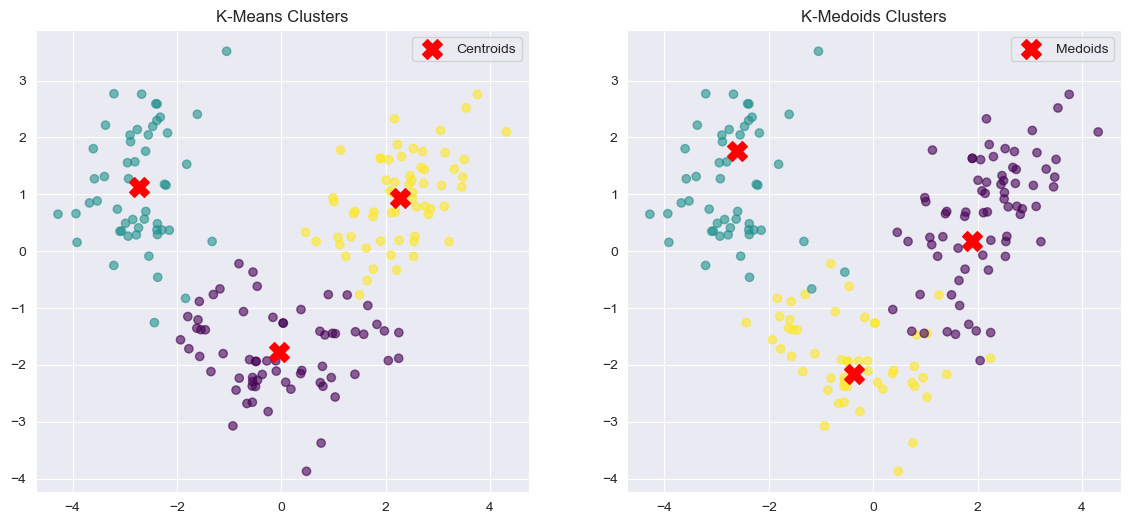

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)  # Using the same standardized data X

# K-Means clustering
from sklearn.cluster import KMeans

k = 3
kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X)
kmeans_centroids = kmeans_model.cluster_centers_

# Project centroids to PCA space
kmeans_centroids_2d = pca.transform(kmeans_centroids)

# K-Medoids clustering (labels and medoids from your previous function)
# medoids already in original feature space; project medoids to PCA space
medoids_2d = pca.transform(medoids)

# Plotting side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-Means plot
scatter1 = axes[0].scatter(X_2d[:,0], X_2d[:,1], c=kmeans_labels, cmap='viridis', alpha=0.6)
axes[0].scatter(kmeans_centroids_2d[:,0], kmeans_centroids_2d[:,1], c='red', marker='X', s=200, label='Centroids')
axes[0].set_title("K-Means Clusters")
axes[0].legend()

# K-Medoids plot
scatter2 = axes[1].scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap='viridis', alpha=0.6)
axes[1].scatter(medoids_2d[:,0], medoids_2d[:,1], c='red', marker='X', s=200, label='Medoids')
axes[1].set_title("K-Medoids Clusters")
axes[1].legend()

plt.show()

Analytical Comparison
Which algorithm produced better-defined clusters?

    K-Means has a slightly higher Silhouette Score (0.2849 vs. 0.2660) indicating more compact and well-separated clusters on average.
    The much higher ARI for K-Means (0.8975 vs. 0.7263) shows its cluster labels align better with true classes.

Observed differences in cluster shapes or positioning?

    K-Means centroids are means of clusters, which can lie anywhere in feature space (not necessarily data points).
    This allows flexible cluster shapes but assumes spherical clusters.

    K-Medoids medoids are actual data points, often more robust to noise and outliers but can yield less "optimal" centroids,
    causing more irregular or elongated cluster shapes.

    The scatter plots likely show that K-Means clusters have smoother boundaries and tighter grouping, while K-Medoids
    clusters may appear slightly more spread or uneven, reflecting its robustness to outliers.

When to prefer K-Means or K-Medoids?

    K-Means is preferable when:

        Data clusters are roughly spherical and similar in size.
        Computational efficiency is important (K-Means is generally faster).
        Dataset is clean with minimal noise/outliers.

    K-Medoids is preferable when:

        Dataset contains noise or outliers that would distort means.
        Interpretability is important (medoids are actual data points).
        Non-Euclidean or custom distance metrics are needed.